# Baseline, PCA, LDA and SVM analysis

- In this project:
  - Use 20% of the images for training and 80% for testing
  - Use 50% of the images for training and 50% for testing
  - Use 80% of the images for training and 20% for testing
  - Always use the first K images per person for training, and the remaining ones for testing (see data split code below)
  - Plot CMC curve and confusion matrix for each combination of scenario and method

- Discussion

## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_lfw_people
from keras.datasets import mnist

from google.colab.patches import cv2_imshow
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

# Get the dataset

In [ ]:
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

(400, 64, 64)


# Split the dataset

In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(320, 4096) (80, 4096)


# Visualize the splits

In [ ]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

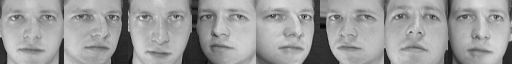

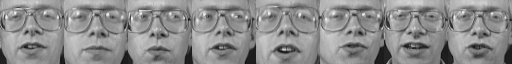

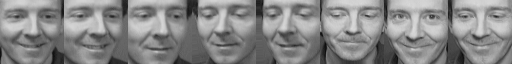

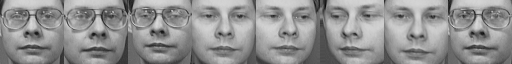

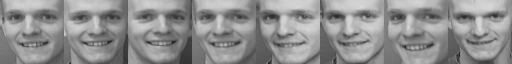

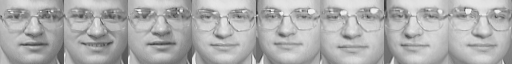

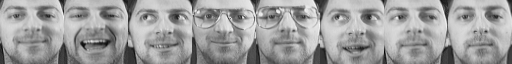

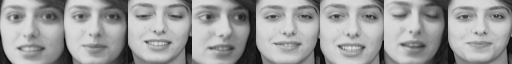

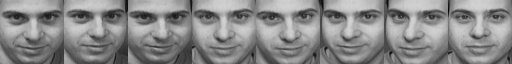

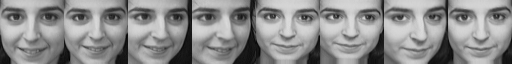

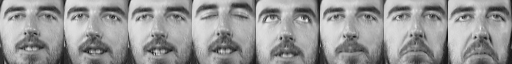

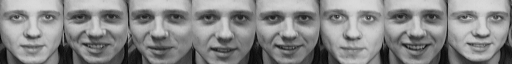

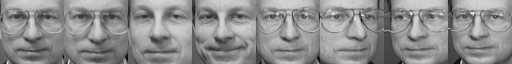

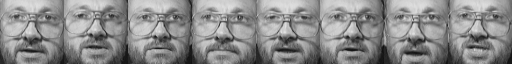

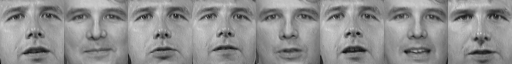

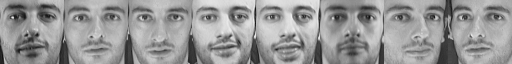

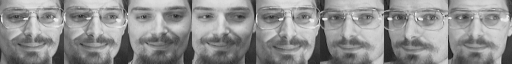

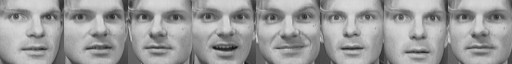

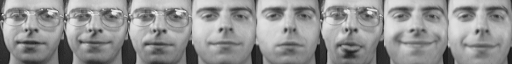

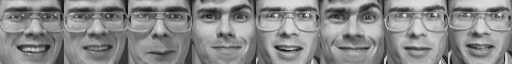

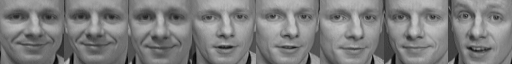

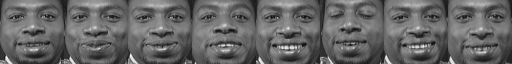

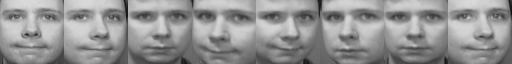

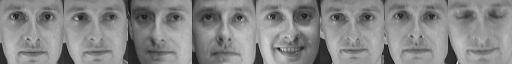

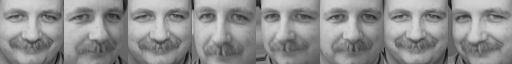

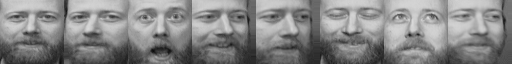

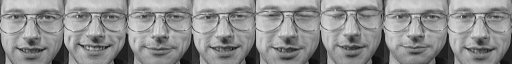

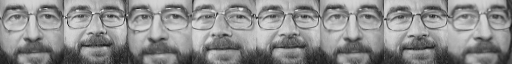

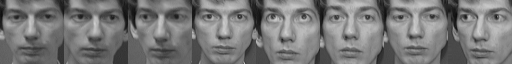

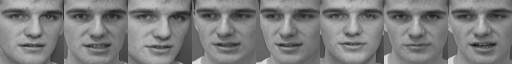

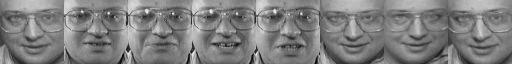

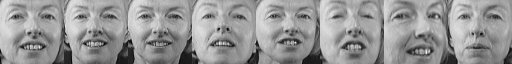

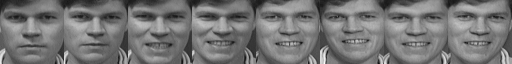

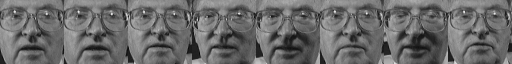

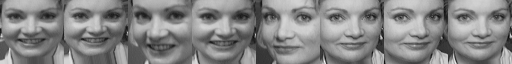

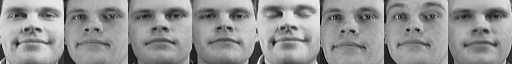

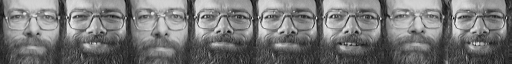

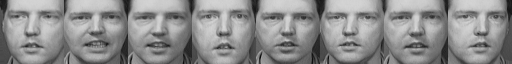

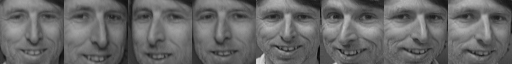

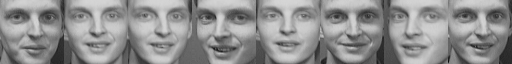

In [ ]:
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)

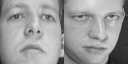

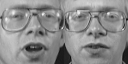

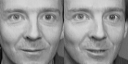

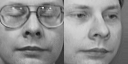

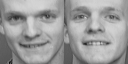

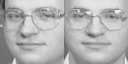

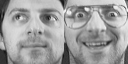

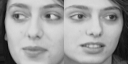

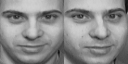

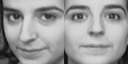

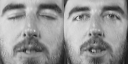

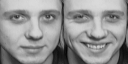

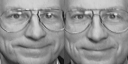

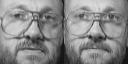

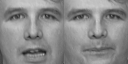

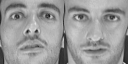

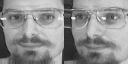

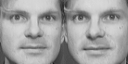

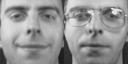

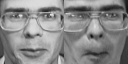

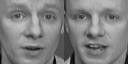

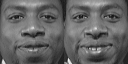

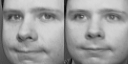

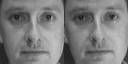

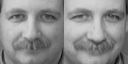

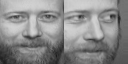

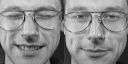

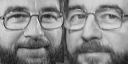

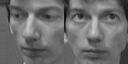

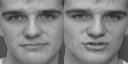

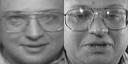

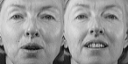

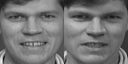

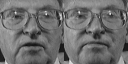

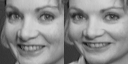

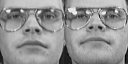

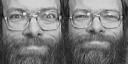

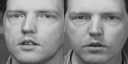

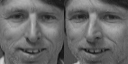

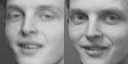

In [ ]:
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

# Implement your baseline

Here is the code for my baseline, along with an explanation of how it works and why it makes sense for this problem.

I choose Naive Bayes algorithm for classification as the baseline for Project 5.

This baseline is an algorithm with the output being one of a finite set of values.

This baseline makes sense because it is indeed a simple and computationally efficient algorithm. Since we have a small/limited amount of training data of only 400 samples in total, Naive Bayes should be more robust compared to algorithms that fit a larger dataset.
I would use the Multinomial Naive Bayes classifier. Below is the algorithm.

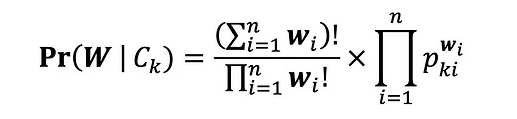

Source: https://towardsdatascience.com/multinomial-na%C3%AFve-bayes-for-documents-classification-and-natural-language-processing-nlp-e08cc848ce6

# Run the experiments

Here is the code I used to get the according results!

**NAIVE BAYES
(20% TRAINING, 80% TESTING)**

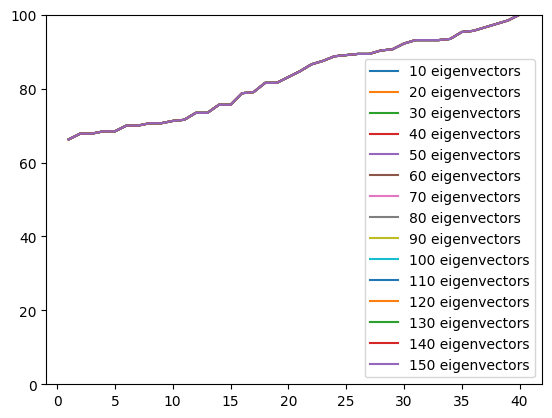

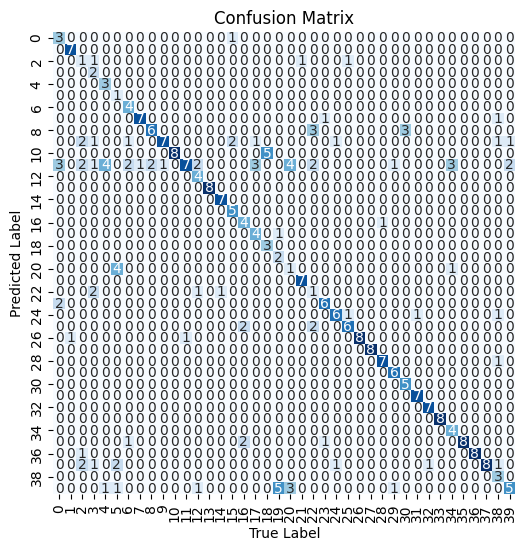

In [ ]:
clf = MultinomialNB()
projected = clf.fit(x_train, y_train)
for i in range(10,151,10):
  clf = MultinomialNB()
  clf.fit(x_train, y_train)
  gallery = clf.predict(x_train)
  probe = clf.predict(x_test)


  #code in class
  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**NAIVE BAYES
(50% TRAINING, 50% TESTING)**

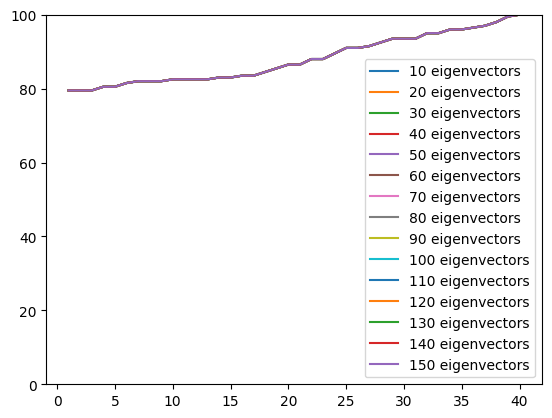

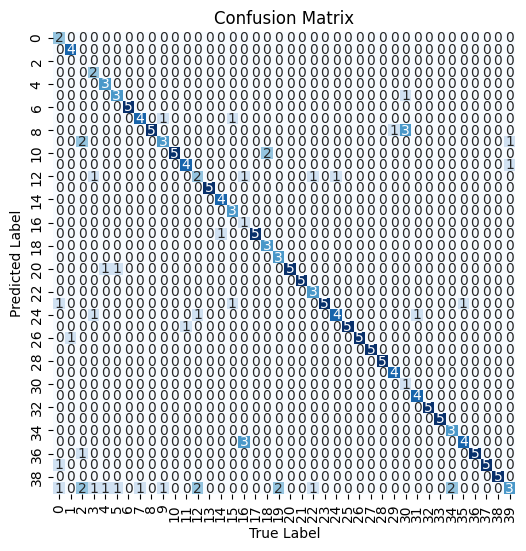

In [ ]:
clf = MultinomialNB()
projected = clf.fit(x_train, y_train)
for i in range(10,151,10):
  clf = MultinomialNB()
  clf.fit(x_train, y_train)
  gallery = clf.predict(x_train)
  probe = clf.predict(x_test)


  #code in class
  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**NAIVE BAYES
(80% TRAINING, 20% TESTING)**

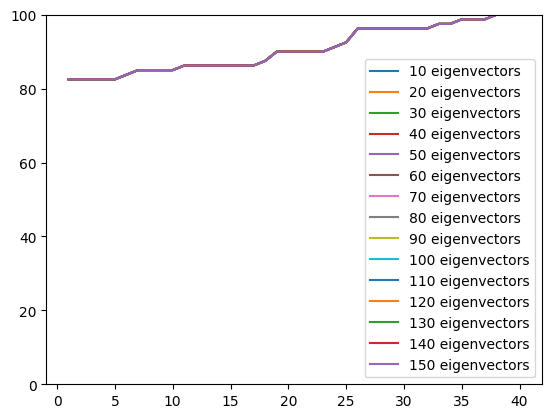

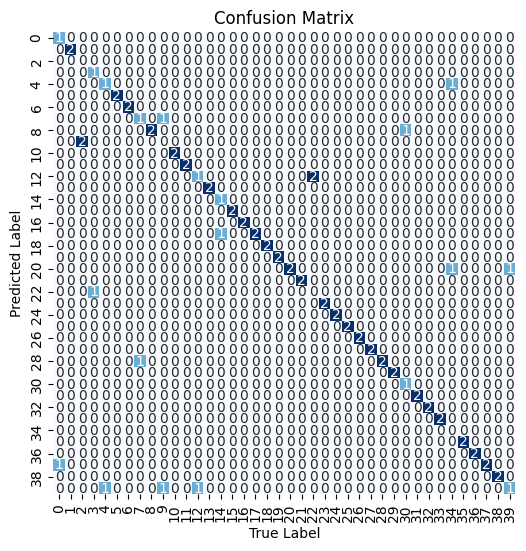

In [ ]:
clf = MultinomialNB()
projected = clf.fit(x_train, y_train)
for i in range(10,151,10):
  clf = MultinomialNB()
  clf.fit(x_train, y_train)
  gallery = clf.predict(x_train)
  probe = clf.predict(x_test)


  #code in class
  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**PCA (20% TRAINING, 80% TESTING)**

4096
(80, 4096)
(80, 2)
[0.24381234 0.1026745 ]


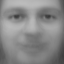

-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


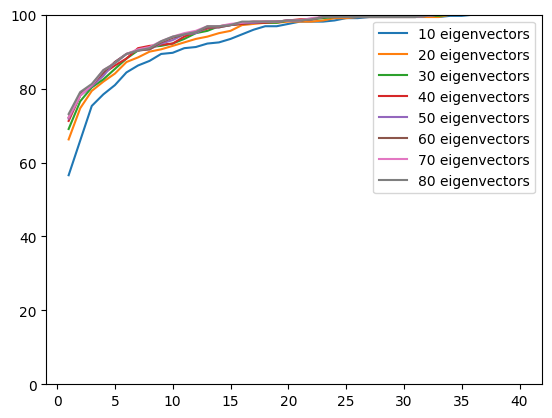

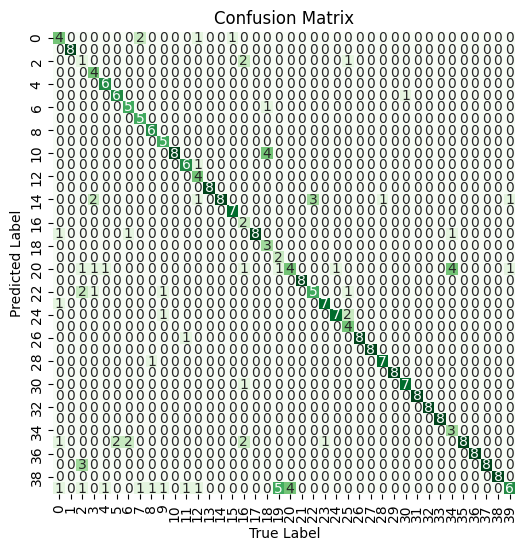

In [ ]:
#code in class
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255.0)
print('-----------------------------------------------------------------')

for i in range(10,81,10):
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


**PCA (50% TRAINING, 50% TESTING)**

4096
(200, 4096)
(200, 2)
[0.2388634  0.11682399]


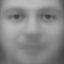

-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


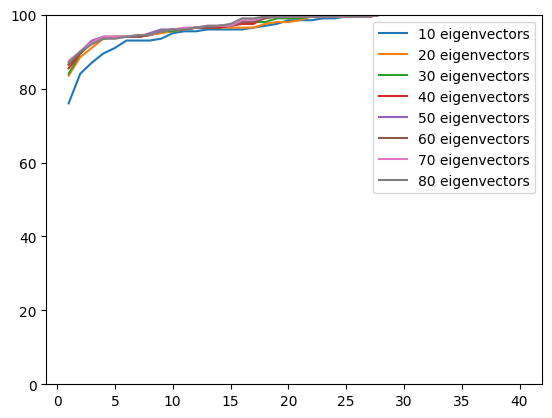

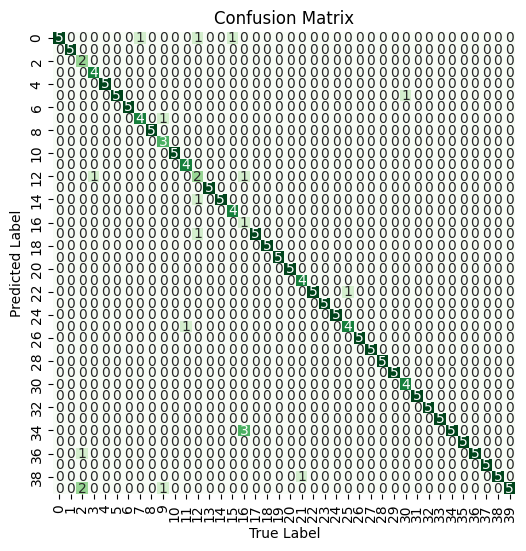

In [ ]:
#code in class
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255.0)
print('-----------------------------------------------------------------')

for i in range(10,81,10):
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


**PCA (80% TRAINING, 20% TESTING)**

4096
(320, 4096)
(320, 2)
[0.23653714 0.12971409]


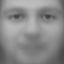

-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


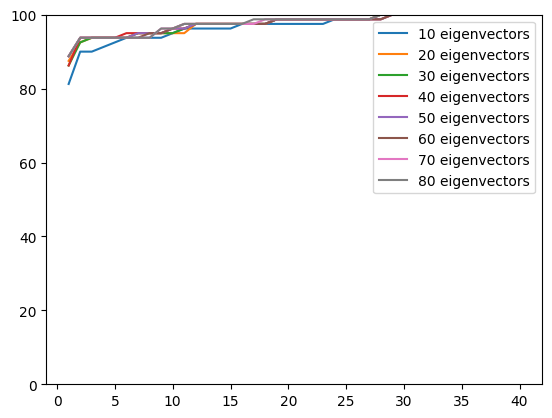

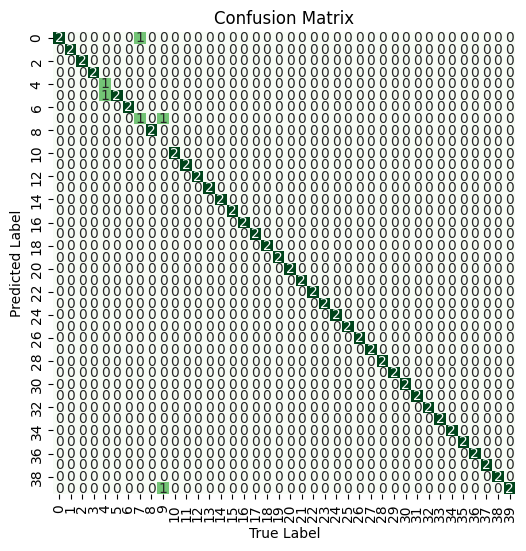

In [ ]:
#code in class
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255.0)
print('-----------------------------------------------------------------')

for i in range(10,81,10):
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


**LDA (20% TRAINING, 80% TESTING)**

(80, 4096)
(80, 2)
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


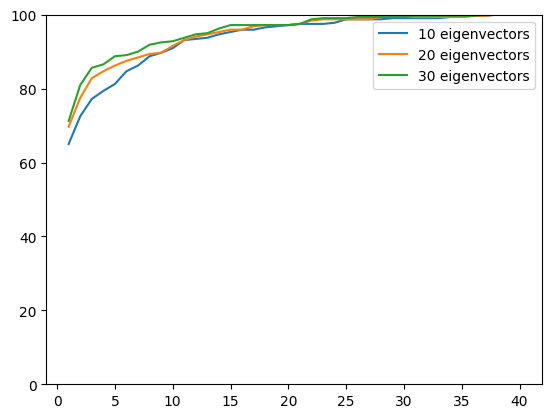

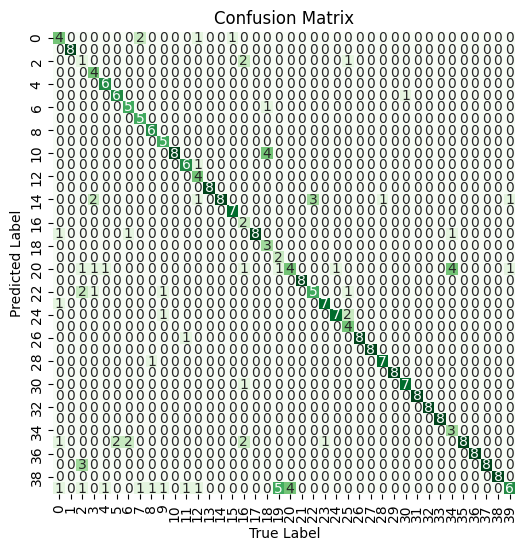

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train.reshape(-1, img_height*img_width), y_train)
print(x_train.shape)
print(projected.shape)
print('-----------------------------------------------------------------')

#code in class

# CMC plots for LDA
for i in range(10,31,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test))
.T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**LDA (50% TRAINING, 50% TESTING)**

(200, 4096)
(200, 2)
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


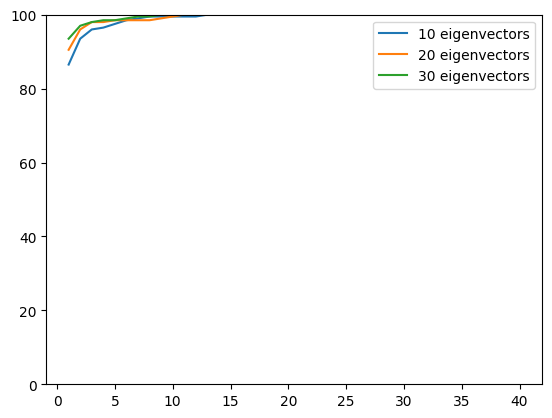

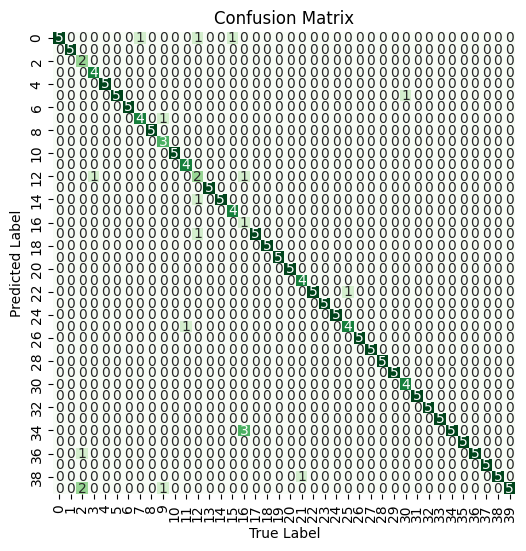

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train.reshape(-1, img_height*img_width), y_train)
print(x_train.shape)
print(projected.shape)
print('-----------------------------------------------------------------')

#code in class

# CMC plots for LDA
for i in range(10,31,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test))
.T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**LDA (80% TRAINING, 20% TESTING)**

(320, 4096)
(320, 2)
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


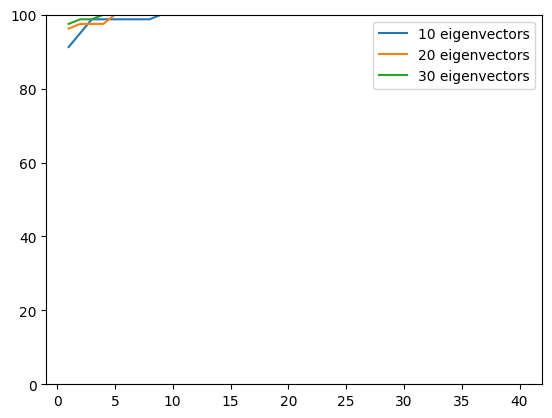

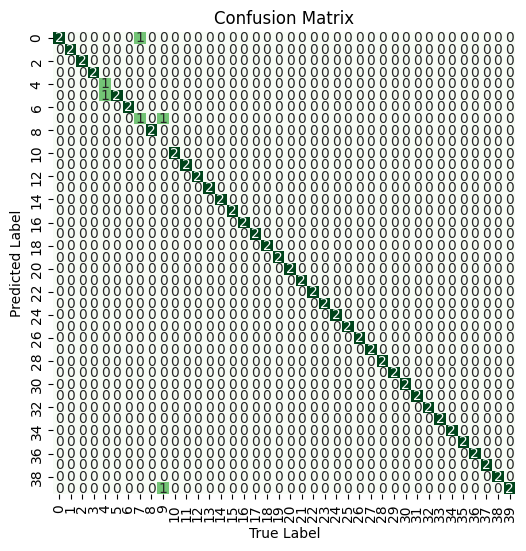

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train.reshape(-1, img_height*img_width), y_train)
print(x_train.shape)
print(projected.shape)
print('-----------------------------------------------------------------')

#code in class

# CMC plots for LDA
for i in range(10,31,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, classifier.predict(x_test))
.T, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**SVM (20% TRAINING, 80% TESTING)**

(320, 40)
-----------------------------------------------------------------


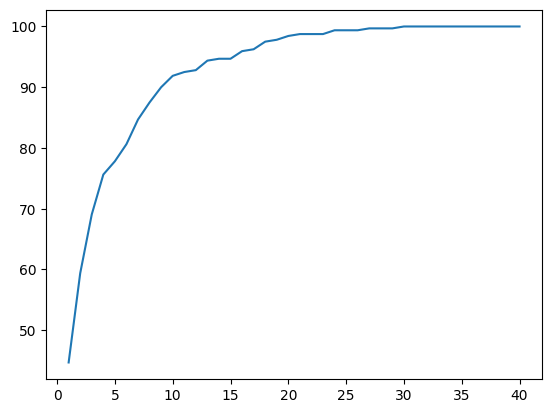

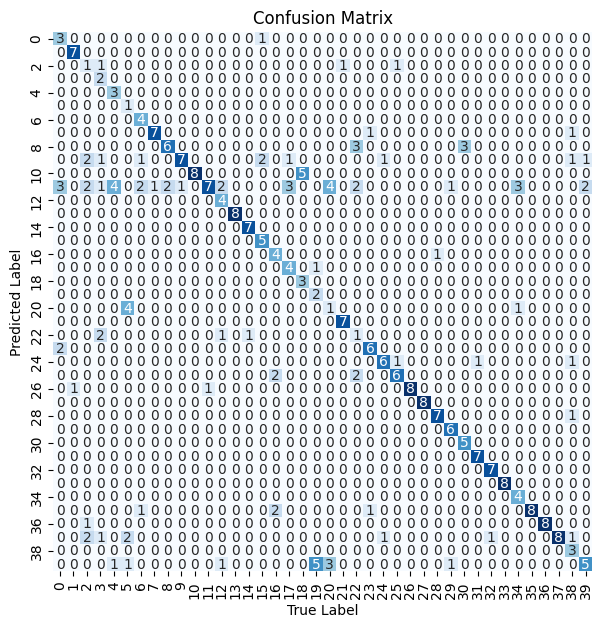

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)
print('-----------------------------------------------------------------')
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()


plot_CMC(yfit, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**SVM (50% TRAINING, 50% TESTING)**

(200, 40)
-----------------------------------------------------------------


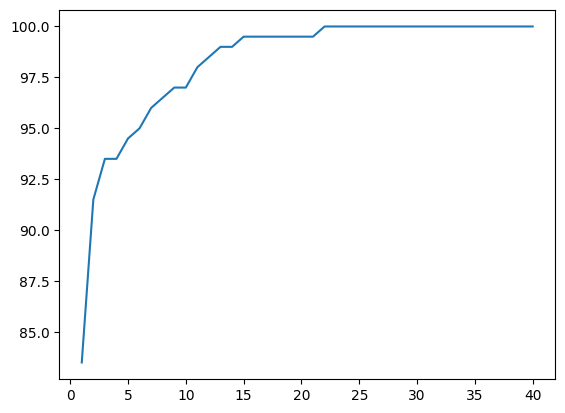

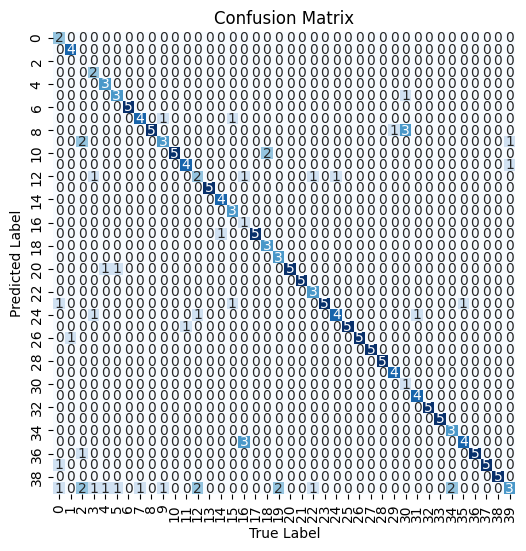

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)
print('-----------------------------------------------------------------')
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()


plot_CMC(yfit, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**SVM (80% TRAINING, 20% TESTING)**

(80, 40)
-----------------------------------------------------------------


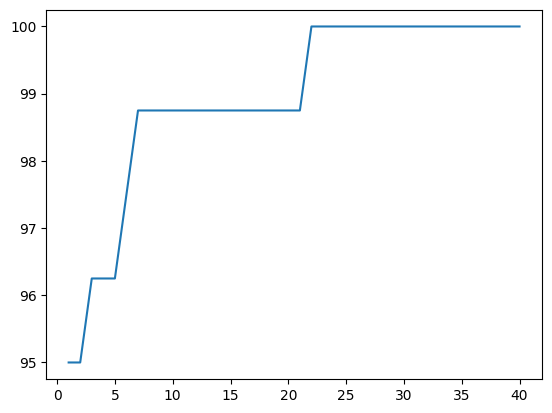

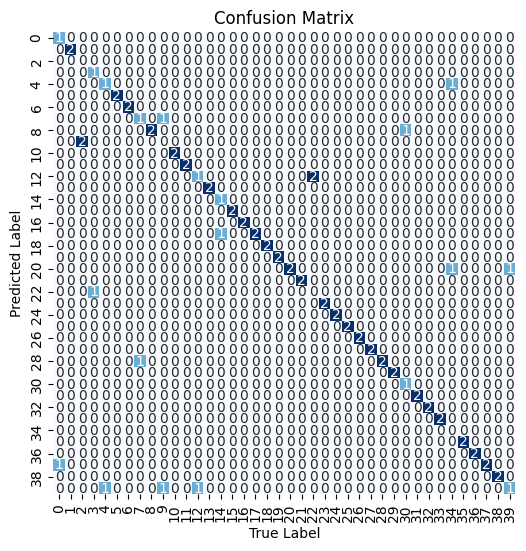

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)
print('-----------------------------------------------------------------')
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()


plot_CMC(yfit, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)).T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



**DISCUSSION**

I did not use any held-out set. Since we have a relatively small dataset, setting aside a portion of data for validation likely has negative effects on estimation reliability, hence not worth the risk

There is a clear difference in performance for different approaches. Naive Bayes has the worst performance. PCA has slightly better outputs but is still overall not good. LDA has the best performance while SVA is the runner-up.
The statement above is in context of having a relatively greater number of pictures for training compared to for testing

There is a clear difference in performance for different train/test data splits. It is consistent that the performance gets better and better as training data take up more and more percentages